In [1]:
# \\  -------- IMPORTS -------- //

from ast import Return
from codecs import getdecoder
from pkgutil import get_data
from typing import List
from unicodedata import name
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt



import backtrader as bt
import talib

# cyclical imports
from statsmodels.tsa.filters.hp_filter import hpfilter


# for outliers in data cleaning
from scipy import stats

# Data API
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

df = 0
df1 = 0

end = dt.datetime.now()  # end date is now
start = dt.datetime(1980, 1, 1)   # start date 



In [2]:
# economic metrics from FRED Data

# labour force participation rate 
# RATES = US 'DFF'

#demographic data 

#risk free rate
riskfreerate = ['DGS3MO'] # 3 month t bills

# US
USGDP = ['GDP'] # GDP QUARTERLY 
USGDPQQ = ['A191RL1Q225SBEA'] # USGDPQQ
USCPI = ['CPIAUCSL'] # CPI monthly
USCPIMM = ['CORESTICKM159SFRBATL'] # CPI MOM
USUR = ['U2RATE'] # UNEMP monthly

USINTR = ['DFF'] # US INTEREST RATE

# EURO
EUGDP = ['CLVMEURSCAB1GQEA19'] # GDP QUARTERLY
EUCPI = ['CP0000EZ19M086NEST'] # CPI monthy
EUUR = ['LRHUTTTTEUM156S'] # UNEMP monthly
#EconomiclistRatesEURO = ['IRLTLT01DEM156N']
#EconomiclistEconomicsEURO = ['NGDPRSAXDCDEQ', 'DEUCPIALLMINMEI', 'LMUNRRTTDEM156S', 'DEUCPIENGAINMEI', 'LFWA64TTDEQ647S']

EUINTR = ['ECBDFR'] #EU INTEREST RATE

# UK
UKGDP = ['CLVMNACSCAB1GQUK'] # GDP QUARTERLY
UKCPI = ['GBRCPIALLMINMEI'] # CPI monthy
UKUR = ['AURUKM'] # UNEMP monthly
#EconomiclistRatesUK = ['IRLTLT01GBM156N']
#EconomiclistEconomicsUK = ['GBRCPIALLMINMEI', 'UKNGDP', 'CPALTT01GBM659N', 'LFWA64TTGBQ647S', 'LRHUTTTTGBM156S']

GBINTR = ['IUDSOIA'] # GB INTEREST RATE

# NZD
NZGDP = ['NAEXKP01NZQ189S'] # GDP QUARTERLY
NZCPI = ['NZLCPIALLQINMEI'] # CPI quarterly
NZUR = ['LRUNTTTTNZQ156S'] # UNEMP quarterly
#EconomiclistRatesEURO = ['IR3TBB01NZM156N', 'NZLCPIALLQINMEI', 'IRLTLT01NZM156N']
#EconomiclistEconomicsEURO = ['LRUNTTTTNZQ156S']

NZINTR = ['IR3TBB01NZM156N'] # NEW ZEALAND INTEREST RATE

#AUD
AUDGDP = ['NGDPRSAXDCAUQ'] # GDP QUARTERLY
AUDCPI = ['CPALTT01AUQ659N'] # CPI quarterly
AUDUR = ['LRUNTTTTAUM156S'] # UNEMP monthly
#EconomiclistRatesAUD = ['IR3TBB01AUQ156N', 'NGDPRSAXDCAUQ', 'AUSCPIALLQINMEI', 'IRLTLT01AUM156N', 'IR3TIB01AUM156N', 'INTDSRAUM193N']
#EconomiclistEconomicsAUD = ['LRHUTTTTAUM156S']
AUINTR = ['IR3TBB01AUM156N'] # AU INTEREST RATES
#CAD
CADGDP = ['NAEXKP01CAQ189S'] # GDP QUARTERLY
CADCPI = ['CPALCY01CAM661N'] # CPI monthy
CADUR = ['LRUNTTTTCAM156S'] # UNEMP monthly
#EconomiclistRatesEURO = ['CPALCY01CAM661N', 'NGDPRSAXDCCAQ', 'LRUNTTTTCAM156S', 'IRLTLT01CAM156N', 'IR3TIB01CAM156N']
#EconomiclistEconomicsEURO = ['MKTGDPCAA646NWDB']
CAINTR = ['IRSTCB01CAM156N'] # CANADA INTEREST RATES

#CHF
CHFGDP = ['CLVMNACSAB1GQCH'] # GDP QUARTERLY
CHFCPI = ['CPALTT01CHM657N'] # CPI monthy
CHFUR = ['LMUNRRTTCHM156S'] # UNEMP monthly
#EconomiclistRatesCHF = ['IRLTLT01CHM156N', 'CHECPIALLMINMEI', 'IR3TIB01CHM156N']
#EconomiclistEconomicsCHF = ['LMUNRRTTCHM156S', 'CHECPIENGQINMEI']
CHINTR = ['IRLTLT01CHM156N'] # SWISS INTEREST RATE

#JPY
JPYGDP = ['JPNRGDPEXP'] # GDP QUARTERLY
JPYCPI = ['JPNCPIALLMINMEI'] # CPI monthy
JPYUR = ['LRUN64TTJPM156S'] # UNEMP monthly
#EconomiclistRatesJPY = ['IRLTLT01JPM156N', 'IR3TIB01JPM156N', 'IR3TCD01JPM156N']
#EconomiclistEconomicsJPY = ['JPNRGDPEXP', 'JPNCPIALLMINMEI', 'JPNNGDP', 'LFWA64TTJPM647S', 'LRUN64TTJPM156S']

JPINTR = ['IRSTCI01JPM156N'] #JPINTEREST RATE

# MAKE INTO  lists of different frequencies # update make one list as i can ffill them all the saem even starting as different frequencies



Economiclist = riskfreerate + USGDP + USGDPQQ + USCPI + USCPIMM + USINTR + EUUR + EUGDP + EUCPI + EUUR + EUINTR + UKGDP + UKCPI + UKUR + GBINTR + NZGDP + NZCPI + NZUR + NZINTR + AUDGDP + AUDCPI + AUDUR + AUINTR + CADGDP + CADCPI + CADUR + CAINTR + CHFGDP + CHFCPI + CHFUR + CHINTR + JPYGDP + JPYCPI + JPYUR + JPINTR


df2_quarterly = pdr.get_data_fred(Economiclist, start, end)

In [3]:
# clean the economic data

result_eco = df2_quarterly.asfreq('D')

result_eco = result_eco.interpolate(method = 'linear') # fill gaps to the correct frequency

result_eco = result_eco.fillna(method = 'ffill')

result_eco = result_eco.fillna(method = 'backfill')

result_eco = result_eco[(np.abs(stats.zscore(result_eco)) < 10).all(axis=1)] # remove any extreme outliers

# drop duplicate columns
result_eco = result_eco.loc[:, ~result_eco.columns.duplicated()]

In [4]:
# import asset data
data = yfin.download(("SPY", 'DX-Y.NYB', 'CL=F', 'GBPUSD=X'), start="1980-01-01", end= dt.datetime.now())

data_1 = pd.DataFrame(data["Close"])

# clean the data

df_asset = data_1.asfreq('D')

df_asset = df_asset.interpolate(method = 'linear') # fill gaps to the correct frequency

df_asset = df_asset.fillna(method = 'ffill')

df_asset = df_asset.fillna(method = 'backfill')

df_asset = df_asset[(np.abs(stats.zscore(df_asset)) < 10).all(axis=1)] # remove any extreme outliers

[*********************100%***********************]  4 of 4 completed


In [5]:
#joining economic and asset data
data = pd.concat([result_eco, df_asset], axis = 1)

data = data.fillna(method = 'ffill')

data = data.fillna(method = 'backfill')


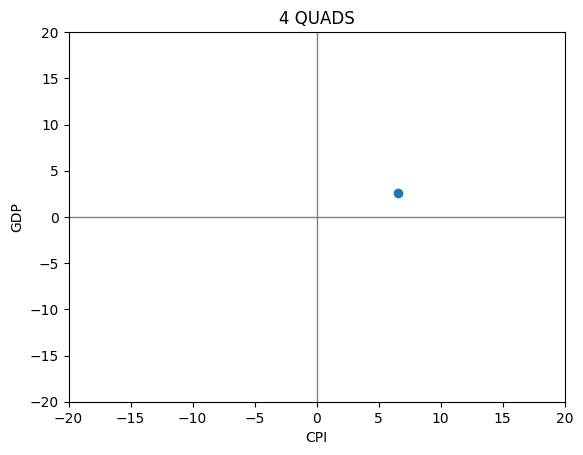

Quad_2: Hawkish
Reflation: GROWING GDP & INFLATION GROWING


In [52]:
#CREATE QUAD PLOT

#create variables
us_cpi = result_eco['CORESTICKM159SFRBATL'].tail(1)
#us_cpi = us_cpi.values()
us_gdp = result_eco['A191RL1Q225SBEA'].tail(1)
#us_gdp = us_gdp.values()

# Generate some random data
x = us_cpi.values
y = us_gdp.values

# Compute the limits of the plot
xlim = max(-20, 20)
ylim = max(-20, 20)

# Create the plot
fig, ax = plt.subplots()
ax.scatter(x, y)

# Draw horizontal and vertical lines at zero
ax.axhline(0, color='gray', linewidth=1)
ax.axvline(0, color='gray', linewidth=1)

# Set the limits of the plot to be symmetric about zero
ax.set_xlim([-xlim, xlim])
ax.set_ylim([-ylim, ylim])

# Set the title and axis labels
ax.set_title('4 QUADS')
ax.set_xlabel('CPI')
ax.set_ylabel('GDP')

# Display the plot
plt.show()


# 4 QUADS

# 1 GROWING GDP & INFLATION SLOWING

# 2 GROWING GDP & INFLATION GROWING

# 3 SLOWING GDP & INFLATION GROWING

# 4 SLOWING GDP & INFLATION SLOWING
us_cpi = pd.to_numeric(us_cpi.values)

us_gdp = pd.to_numeric(us_gdp.values)

#find current quad


if (us_cpi < 3 and us_gdp > 0):
    current_quad = 'Quad_1: Neutral'
    environment = 'Goldilocks: GROWING GDP & INFLATION SLOWING'

elif (us_cpi > 3 and us_gdp > 0):
    current_quad = 'Quad_2: Hawkish'
    environment = 'Reflation: GROWING GDP & INFLATION GROWING'
    
elif (us_cpi > 3 and us_gdp < 0):
    current_quad = 'Quad_3: Stagflation'
    environment = 'Stagflation: SLOWING GDP & INFLATION GROWING'
    
else:
    current_quad = 'Quad_4: Deflation'
    environment = 'Deflation: SLOWING GDP & INFLATION SLOWING'
    
print(current_quad)
print(environment)

In [53]:
# select asset
asset = ['DX-Y.NYB']

In [54]:
# creating the quads criteria
# 1 GROWING GDP & INFLATION SLOWING
quad_1_data = data[asset][(data['CORESTICKM159SFRBATL'] < 0) & (data['A191RL1Q225SBEA'] > 0)]
# CORESTICKM159SFRBATL
# A191RL1Q225SBEA
# 2 GROWING GDP & INFLATION GROWING
quad_2_data = data[asset][(data['CORESTICKM159SFRBATL'] > 0) & (data['A191RL1Q225SBEA'] > 0)]

# 3 SLOWING GDP & INFLATION GROWING
quad_3_data = data[asset][(data['CORESTICKM159SFRBATL'] > 0) & (data['A191RL1Q225SBEA'] < 0)]

# 4 SLOWING GDP & INFLATION SLOWING
quad_4_data = data[asset][(data['CORESTICKM159SFRBATL'] < 0) & (data['A191RL1Q225SBEA'] < 0)]

In [63]:
#QUAD PERFORMANCE METRICS

#fixing the returns do the gaps in price dont skew the data
quad_1_perf = ((quad_1_data - quad_1_data.shift(1)) / quad_1_data.shift(1))
quad_2_perf = ((quad_2_data - quad_2_data.shift(1)) / quad_2_data.shift(1))
quad_3_perf = ((quad_3_data - quad_3_data.shift(1)) / quad_3_data.shift(1))
quad_4_perf = ((quad_4_data - quad_4_data.shift(1)) / quad_4_data.shift(1))

# convert date column to datetime format
quad_1_perf['date'] = pd.to_datetime(quad_1_perf.index)
quad_2_perf['date'] = pd.to_datetime(quad_2_perf.index)
quad_3_perf['date'] = pd.to_datetime(quad_3_perf.index)
quad_4_perf['date'] = pd.to_datetime(quad_4_perf.index)

# create a new column to check if the date from the previous row is not the day before the date of the subsequent column
quad_1_perf['diff'] = (quad_1_perf['date'] - quad_1_perf['date'].shift(1)).dt.days != 1
quad_2_perf['diff'] = (quad_2_perf['date'] - quad_2_perf['date'].shift(1)).dt.days != 1
quad_3_perf['diff'] = (quad_3_perf['date'] - quad_3_perf['date'].shift(1)).dt.days != 1
quad_4_perf['diff'] = (quad_4_perf['date'] - quad_4_perf['date'].shift(1)).dt.days != 1

# filter out the rows where the diff column is True
quad_1_perf = quad_1_perf.loc[~quad_1_perf['diff'], ['date', asset[0]]]
quad_2_perf = quad_2_perf.loc[~quad_2_perf['diff'], ['date', asset[0]]]
quad_3_perf = quad_3_perf.loc[~quad_3_perf['diff'], ['date', asset[0]]]
quad_4_perf = quad_4_perf.loc[~quad_4_perf['diff'], ['date', asset[0]]]

#drop date column 
quad_1_perf = quad_1_perf.drop('date', axis = 1)
quad_2_perf = quad_2_perf.drop('date', axis = 1)
quad_3_perf = quad_3_perf.drop('date', axis = 1)
quad_4_perf = quad_4_perf.drop('date', axis = 1)

# replace with incrementing numbers so its all consecutive
quad_1_perf = quad_1_perf.reset_index(drop=True)
quad_2_perf = quad_2_perf.reset_index(drop=True)
quad_3_perf = quad_3_perf.reset_index(drop=True)
quad_4_perf = quad_4_perf.reset_index(drop=True)

# calculate avg return
quad_1_perf_avg = quad_1_perf.mean() * 100
quad_2_perf_avg = quad_2_perf.mean() * 100
quad_3_perf_avg = quad_3_perf.mean() * 100
quad_4_perf_avg = quad_4_perf.mean() * 100

#convert to float
quad_1_perf_avg = float(quad_1_perf_avg)
quad_2_perf_avg = float(quad_2_perf_avg)
quad_3_perf_avg = float(quad_3_perf_avg)
quad_4_perf_avg = float(quad_4_perf_avg)

In [64]:
#cumulative returns
quad_1_perf['cumulative_returns'] = (1 + quad_1_perf['DX-Y.NYB']).cumprod() - 1
quad_2_perf['cumulative_returns'] = (1 + quad_2_perf['DX-Y.NYB']).cumprod() - 1
quad_3_perf['cumulative_returns'] = (1 + quad_3_perf['DX-Y.NYB']).cumprod() - 1
quad_4_perf['cumulative_returns'] = (1 + quad_4_perf['DX-Y.NYB']).cumprod() - 1


<AxesSubplot:>

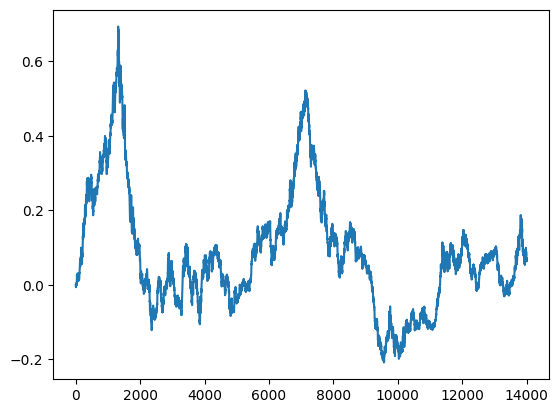

In [65]:
quad_2_perf['cumulative_returns'].plot()

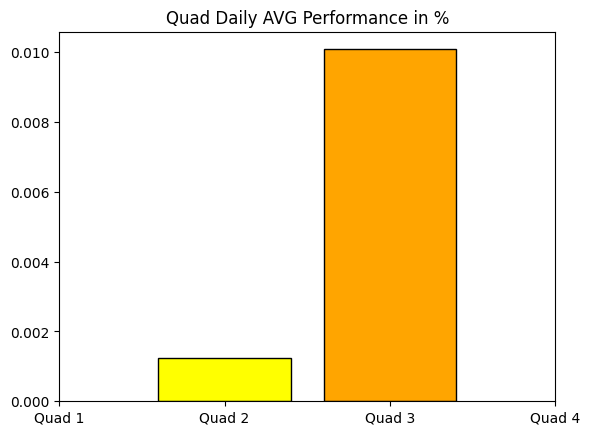

CURRENT QUAD:  Quad_2: Hawkish


In [66]:

# create sample data
categories = ['Quad 1', 'Quad 2', 'Quad 3', 'Quad 4']
values = [quad_1_perf_avg, quad_2_perf_avg, quad_3_perf_avg, quad_4_perf_avg]

# create the plot
plt.bar(categories, values, color=['green', 'yellow', 'orange', 'red'], edgecolor='black')

# add x-axis ticks and labels
plt.xticks(categories)

# add a title
plt.title('Quad Daily AVG Performance in %')

# display the plot
plt.show()
print('CURRENT QUAD: ', current_quad)

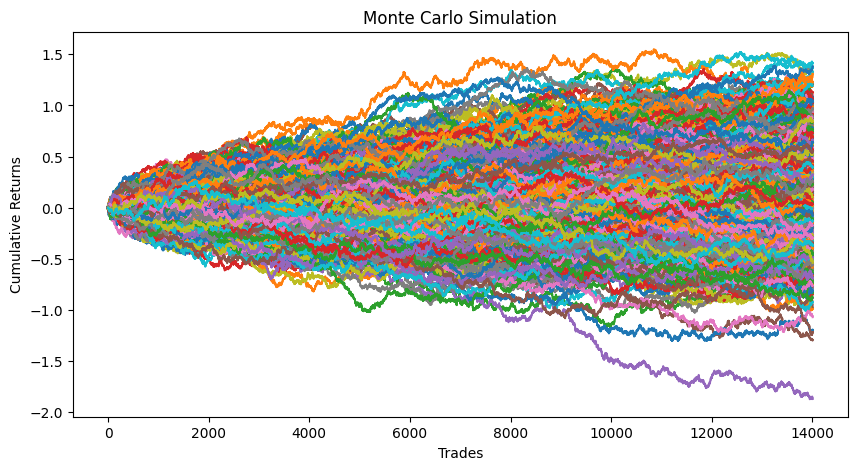

Average End Performance: 0.19754675122631773
Lowest Ending Performance: -0.7950428555051693
Best Ending Performance: 4.845297924715205
Average Return Rate: 0.49211887762387546



In [69]:
#monte carlo performance of asset curve in environment

returns = quad_2_perf[asset]
returns

# define parameters
num_simulations = 1000
trades_per_simulation = len(returns)
end_performance = np.zeros(num_simulations)
win_rates = np.zeros(num_simulations)

# run monte carlo simulation
for i in range(num_simulations):
    sample_returns = returns.sample(n=trades_per_simulation, replace=True)
    cumulative_returns = np.cumprod(1 + sample_returns) - 1
    end_performance[i] = cumulative_returns.iloc[-1]
    win_rates[i] = np.sum(sample_returns > 0) / trades_per_simulation

# plot results
fig, ax = plt.subplots(figsize=(10,5))
for i in range(num_simulations):
    ax.plot(range(1, trades_per_simulation+1), np.cumsum(returns.sample(n=trades_per_simulation, replace=True)))
ax.set_xlabel('Trades')
ax.set_ylabel('Cumulative Returns')
ax.set_title('Monte Carlo Simulation')
plt.show()

#stats
print('Average End Performance:', np.mean(end_performance))
print('Lowest Ending Performance:', np.min(end_performance))
print('Best Ending Performance:', np.max(end_performance))
print('Average Return Rate:', np.mean(win_rates))
print('')